In [0]:
# Fill in your name using the format below and student ID number
your_name = "LIU, XIAO"
student_id = "1385178"

In [0]:
# Before submission, set this to True so that you can render and verify this notebook without training deep learning models.
# Any deep learning models will be trained from file instead.
stop_training = True

In [0]:
# Uncomment the following line to run in Google Colab
!pip install --quiet openml 

     |████████████████████████████████| 163kB 5.1MB/s 


In [0]:
# Uncomment the following line to run in Google Colab
#%tensorflow_version 2.x
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU') # Check whether GPUs are available

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [0]:
%matplotlib inline
import openml as oml
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [0]:
from packaging import version
import sklearn
import tensorflow
sklearn_version = sklearn.__version__
tensorflow_version = tensorflow.__version__
if version.parse(sklearn_version) < version.parse("0.22.0"):
    print("scikit-learn is outdated. Please update now!")
if version.parse(tensorflow_version) < version.parse("2.1.0"):
    print("Tensorflow is outdated. This is version {}. Please update to 2.1.".format(tensorflow_version))
else:
    print("Hi{}, Looks good. You may continue :)".format(your_name.split(",")[1]))

Hi XIAO, Looks good. You may continue :)


# Assignment 3

### Choice of libraries
We recommend to use Tensorflow in this assignment since that is what we covered in the labs. If you feel confident using PyTorch (and Skorch for the scikit-learn wrapper), that is allowed too, as long as you are able to implement the requested functions and return the requested data. Read the assignment carefully and ensure that you can. Note that you may also need to do a bit more work to implement certain helper functions and wrappers.

### Storing and submitting files
You must be able to store your models and submit them to GitHub Classroom. The evaluation functions used in this notebook will automatically store models for you.

If you want to run and solve the notebook on your local machine/laptop, fill in the path 'base_dir' to your assignment folder into the next cell.

If you use Colab, we recommend that you link it to your Google Drive:  
* Upload the assignment folder to your Google Drive (+ New > Folder Upload)
* Open Colab in a browser, open the 'Files' menu in the left sidebar, and click 'Mount Drive'
  * At this point you may need to authenticate
* Fill in the path to your assignment folder below
  * It's likely '/content/drive/My Drive/assignment-3-yourname'

In [0]:
base_dir = '/content/drive/My Drive/assignment-3-Archimedes2013-master' # For Google Colab
# base_dir = './'

In [0]:
#Uncomment to link Colab notebook to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Using GPUs
While you can solve this assignment on a CPU, using a GPU will speed things up training quite a bit. If you have a local GPU, you can use that. If you don't, we recommend Google Colab. When you are in Colab:
* In Runtime > Change runtime type, select the GPU under Hardware Accelerator
* Run the 3rd cell on the top of this notebook to check that the GPU is found.

Note that Colab may not always have GPUs ready all the time, and may deny you a GPU when you have used them a lot. When you are temporarily 'locked out', you can switch to a non-GPU runtime or to a local instance of Jupyter running on your machine.

### Constraints
* Your stored models should not be larger than 100MB when stored in file. GitHub will not allow uploading if they are.
* When questions ask you to provide an explanation, it should be less than 500
characters long. Some questions have a higher limit. Always answer in full sentences.
* Don't train for more than 100 epochs, i.e. don't throw excessing computational resources at the problem. If your model hasn't converged by then, think of ways it could be made to converge faster. In this assignment you are not after the last tiny improvement, you can stop when learning curves flatten out. Do at least 5 epochs to get a reasonable learning curve.

### Grading
Grading is based on the following aspects:
* Correctness in answering the question. Carefully read the question and answer
what is asked for. Train your models on the correct data. It should be clear on which data should be trained, but ask when in doubt. When something is not defined (e.g. the number of epochs or batch size), you can freely choose them.
* Clarity of your explanations. Write short but precise descriptions of what you did and why. Give short but clear explanations of the observed performance. 
After your explanation, your approach and model should make perfect sense. Refrain from using symbols as substitute for words in your explanation (e.g. no: "More layers -> more parameters" yes: "More layers mean more parameters"). 
* Part of your grade depends on how well your model performs. When the question says 'you should at least get x%', x% will give you a good but not the maximal grade. You can get the full grade when you are close to what is the expected maximal performance. You don't need to invest lots of effort into the last tiny improvement, though. Unless specified, we look at the accuracy on the validation set. If your learning curves are very erratic we'll compute a score based on the smoothed curves (i.e. single peaks don't count).
* The weight of each question is indicated. Take this into account when planning your time.

### Other tips
* Don't wait until the last minute to do the assignment. The models take time to train, most questions will require some thinking, and some require you to read up on some new concepts.
* Take care that you upload the results as requested. You need to submit not only the notebooks but also the trained models and learning curves (training histories). Be sure to run the verification script and check that all the results are included.
* We provide an evaluation function that also stored models to disk. After you are done training the model, set the 'train' attribute to False so that the model doesn't train again (and loads from file instead) when you restart and rerun your notebook.
* Explore. For many questions we'll ask you to explain your model design decisions. You cannot magically know the best solutions but you can experiment
based on your understanding and make decisions based on both your knowledge and experiments. Your explanation is at least as important as the performance of your model.
* Be original. We will check for plagiarism between student submissions.

### Data
The [Street View House Numbers Dataset](https://www.openml.org/d/41081) contains 32-by-32 RGB images centered around a single digit of a house number appearing in Google Street View. Many of the images do contain some distractors at the sides. It consists of 10 classes, 1 for each digit. Digit '1' has label 1, '9' has label 9 and '0' has label 10. Your goal is to build models that recognize the correct digit.

If you use Colab, uncomment the following to cache the dataset inside the VM. This will make reloading faster if you need to restart your notebook. After longer periods of inactivity, your VM may be recycled and the cache lost, in which case the dataset will be downloaded again. Also note that this dataset is about 1Gb large, and will take even more space in memory. You may need to switch to a high-RAM environment (Colab will ask you if you hit the limit).

In [0]:
# Use OpenML caching in Colab
# On your local machine, it will store data in a hidden folder '~/.openml'
import os
oml.config.cache_directory = os.path.expanduser('/content/cache')

In [0]:
# Download Streetview data. Takes a while (several minutes), and quite a bit of
# memory when it needs to download. After caching it loads faster.
SVHN = oml.datasets.get_dataset(41081)
X, y, _, _ = SVHN.get_data(dataset_format='array',
    target=SVHN.default_target_attribute)

Reshape, sample and split the data

In [0]:
from tensorflow.keras.utils import to_categorical

Xr = X.reshape((len(X),32,32,3))
Xr = Xr / 255.
yr = to_categorical(y)

In [0]:
# DO NOT EDIT. DO NOT OVERWRITE THESE VARIABLES.
from sklearn.model_selection import train_test_split
# We do an 80-20 split for the training and test set, and then again a 80-20 split into training and validation data
X_train_all, X_test, y_train_all, y_test = train_test_split(Xr,yr, stratify=yr, train_size=0.8, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_all,y_train_all, stratify=y_train_all, train_size=0.8, random_state=1)
evaluation_split = X_train, X_val, y_train, y_val

Check the formatting - and what the data looks like

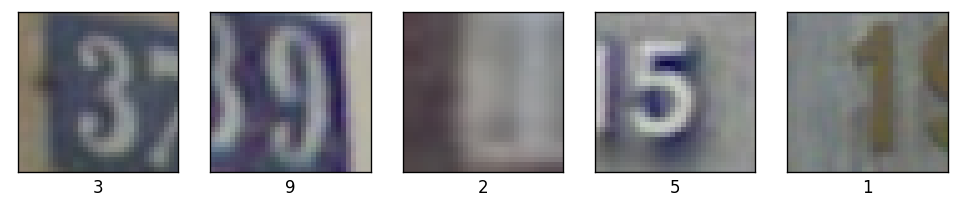

In [0]:
from random import randint

# Takes a list of row ids, and plots the corresponding images
# Use grayscale=True for plotting grayscale images
def plot_images(X, y, grayscale=False):
    fig, axes = plt.subplots(1, len(X),  figsize=(10, 5))
    for n in range(len(X)):
        if grayscale:
            axes[n].imshow(X[n], cmap='gray')
        else:
            axes[n].imshow(X[n])
        axes[n].set_xlabel((np.argmax(y[n])+1)%10) # Label is index+1
        axes[n].set_xticks(()), axes[n].set_yticks(())
    plt.show();

images = [randint(0,len(X_train)) for i in range(5)]
X_random = [X_train[i] for i in images]
y_random = [y_train[i] for i in images]
plot_images(X_random, y_random)

### Evaluation harness
We provide an evaluation function 'run_evaluation' that you should use to 
evaluate all your models. It also stores the trained models to disk so that
your submission can be quickly verified, as well as to avoid having to train
them over and over again. Your last run of the evaluation function (the last one
stored to file), is the one that will be evaluated. The 'train' argument indicates whether to train or to load from disk. We have provided helper functions for saving and loading models to/from file, assuming you use TensorFlow. If you use PyTorch you'll have to adapt them.

In [0]:
import os
import pickle
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model # for use with tensorflow

def shout(text, verbose=1):
    """ Prints text in red. Just for fun.
    """
    if verbose>0:
        print('\033[91m'+text+'\x1b[0m')

def load_model_from_file(base_dir, name, extension='.h5'):
    """ Loads a model from a file. The returned model must have a 'fit' and 'summary'
    function following the Keras API. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
    base_dir -- Directory where the models are stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    try:
        model = load_model(os.path.join(base_dir, name+extension))
    except OSError:
        shout("Saved model could not be found. Was it trained and stored correctly? Is the base_dir correct?")
        return False
    return model

def save_model_to_file(model, base_dir, name, extension='.h5'):
    """ Saves a model to file. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
    model -- the model to be saved
    base_dir -- Directory where the models should be stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    model.save(os.path.join(base_dir, name+extension))

# Helper function to extract min/max from the learning curves
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

# DO NOT EDIT
def run_evaluation(name, model_builder, data, base_dir, train=True, 
                   generator=False, epochs=3, batch_size=32, steps_per_epoch=60, 
                   verbose=1, **kwargs):
    """ Trains and evaluates the given model on the predefined train and test splits,
    stores the trained model and learning curves. Also prints out a summary of the 
    model and plots the learning curves.
    Keyword arguments:
    name -- the name of the model to be stored, e.g. 'question_1_1.h5'
    model_builder -- function that returns an (untrained) model. The model must 
                     have a 'fit' function that follows the Keras API. It can wrap
                     a non-Keras model as long as the 'fit' function takes the 
                     same attributes and returns the learning curves (history).
                     It also must have a 'summary' function that prints out a 
                     model summary, and a 'save' function that saves the model 
                     to disk. 
    data -- data split for evaluation. A tuple of either:
            * Numpy arrays (X_train, X_val, y_train, y_val)
            * A data generator and validation data (generator, X_val, y_val)
    base_dir -- the directory to save or read models to/from
    train -- whether or not the data should be trained. If False, the trained model
             will be loaded from disk.
    generator -- whether the data in given as a generator or not
    epochs -- the number of epochs to train for
    batch_size -- the batch size to train with
    steps_per_epoch -- steps per epoch, in case a generator is used (ignored otherwise)
    verbose -- verbosity level, 0: silent, 1: minimal,...
    kwargs -- keyword arguments that should be passed to model_builder.
              Not required, but may help you to adjust its behavior
    """
    model = model_builder(**kwargs)
    if not model:
        shout("No model is returned by the model_builder")
        return
    if not hasattr(model, 'fit'):
        shout("Model is not built correctly")
        return
    learning_curves = {}
    if train and not stop_training: # Train anew
        shout("Training the model", verbose)
        if generator:
            generator, X_val, y_val = data
            history = model.fit(generator, epochs=epochs, batch_size=batch_size,
                              steps_per_epoch=steps_per_epoch, verbose=1, 
                              validation_data=(X_val, y_val))
            learning_curves = history.history
        else:
            X_train, X_val, y_train, y_val = data
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                              verbose=1, validation_data=(X_val, y_val))
            learning_curves = history.history
        shout("Saving to file", verbose)
        save_model_to_file(model, base_dir, name)
        with open(os.path.join(base_dir, name+'.p'), 'wb') as file_pi:
            pickle.dump(learning_curves, file_pi)
        shout("Model stored in "+base_dir, verbose)
    else: # Load from file
        shout("Loading model from file", verbose)
        model = load_model_from_file(base_dir, name)
        if not model:
            shout("Model not found")
            return
        learning_curves = None
        try:
            learning_curves = pickle.load(open(os.path.join(base_dir, name+'.p'), "rb"))
        except FileNotFoundError:
            shout("Learning curves not found")
            return
        shout("Success!", verbose)
    # Report
    print(model.summary())
    lc = pd.DataFrame(learning_curves)
    lc.plot(lw=2,style=['b:','r:','b-','r-']);
    plt.xlabel('epochs');
    print(lc.apply(minMax))

Training the model
Epoch 1/3
1986/1986 [==============================] - 7s 4ms/step - loss: 2.2457 - accuracy: 0.1904 - val_loss: 2.2331 - val_accuracy: 0.1910
Epoch 2/3
1986/1986 [==============================] - 7s 3ms/step - loss: 2.2332 - accuracy: 0.1910 - val_loss: 2.2331 - val_accuracy: 0.1910
Epoch 3/3
1986/1986 [==============================] - 7s 3ms/step - loss: 2.2334 - accuracy: 0.1909 - val_loss: 2.2331 - val_accuracy: 0.1910
Saving to file
Model stored in /content/drive/My Drive/assignment-3-Archimedes2013-master
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                30730     
_________________________________________________________________
dense_1 (Dense)              (None, 10)       

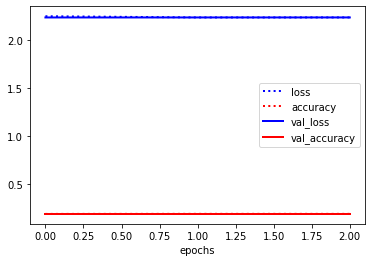

In [0]:
# Toy usage example
# Remove before submission
from tensorflow.keras import models
from tensorflow.keras import layers 

def build_toy_model():
    model = models.Sequential()
    model.add(layers.Reshape((3072,), input_shape=(32,32,3)))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# First build and store
run_evaluation("toy_example", build_toy_model, evaluation_split, base_dir, 
               train=True, epochs=3, batch_size=32)

Loading model from file
Success!
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                30730     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 30,840
Trainable params: 30,840
Non-trainable params: 0
_________________________________________________________________
None
         loss  accuracy  val_loss  val_accuracy
min  2.233313  0.189743  2.233042      0.190974
max  2.246840  0.190939  2.233114      0.190974


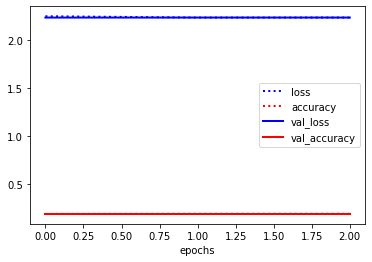

In [0]:
# Toy usage example
# Remove before submission
# With train=False: load from file and report the same results without rerunning
run_evaluation("toy_example", build_toy_model, evaluation_split, base_dir, 
               train=False)

from tensorflow.keras import optimizers## Part 1. Dense networks (10 points)

### Question 1.1: Baseline model (4 points)
- Build a dense network (with only dense layers) of at least 3 layers that is shaped like a pyramid: The first layer must have many nodes, and every subsequent layer must have increasingly fewer nodes, e.g. half as many. Implement a function 'build_model_1_1' that returns this model.
- You can explore different settings, but don't use any preprocessing or regularization yet. You should be able to achieve at least 70% accuracy, but more is of course better. Unless otherwise stated, you can use accuracy as the evaluation metric in all questions.
* Add a small description of your design choices (max. 500 characters) in 'answer_q_1_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- The name of the model should be 'model_1_1'. Evaluate it using the 'run_evaluation' function. For this question, you should not use more than 50 epochs.

Training the model
Train on 63544 samples, validate on 15887 samples
Epoch 1/20
63544/63544 [==============================] - 2s 36us/sample - loss: 2.3068 - accuracy: 0.1784 - val_loss: 2.2576 - val_accuracy: 0.1910
Epoch 2/20
63544/63544 [==============================] - 2s 35us/sample - loss: 2.1015 - accuracy: 0.2297 - val_loss: 1.8238 - val_accuracy: 0.3893
Epoch 3/20
63544/63544 [==============================] - 2s 34us/sample - loss: 1.6704 - accuracy: 0.4329 - val_loss: 1.5270 - val_accuracy: 0.4916
Epoch 4/20
63544/63544 [==============================] - 2s 34us/sample - loss: 1.4443 - accuracy: 0.5292 - val_loss: 1.3905 - val_accuracy: 0.5479
Epoch 5/20
63544/63544 [==============================] - 2s 34us/sample - loss: 1.3170 - accuracy: 0.5784 - val_loss: 1.3017 - val_accuracy: 0.5941
Epoch 6/20
63544/63544 [==============================] - 2s 34us/sample - loss: 1.2216 - accuracy: 0.6160 - val_loss: 1.3613 - val_accuracy: 0.5709
Epoch 7/20
63544/63544 [=============

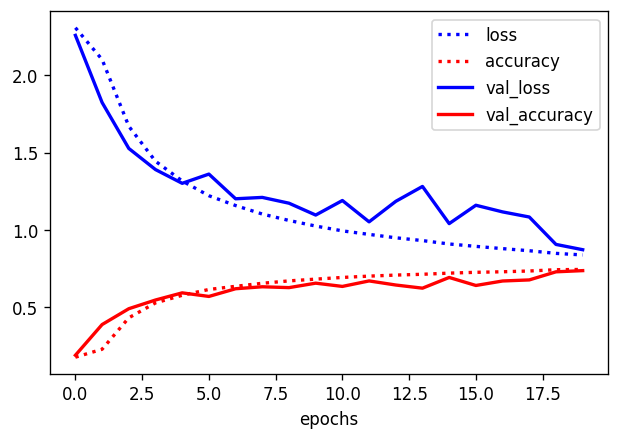

In [0]:
from tensorflow.keras import optimizers

def build_model_1_1():
  model = models.Sequential()
  model.add(layers.Reshape((3072,), input_shape=(32,32,3)))
  model.add(layers.Dense(512, activation='relu', input_shape=(32*32*3,)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(10, activation='sigmoid'))

  model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
  return model



run_evaluation("model_1_1", build_model_1_1, evaluation_split, base_dir, train=True, epochs=20, batch_size=128)

answer_q_1_1 = """ A three layers network has been constructed and trained. The input dimension is 3072, so the first layer cuts it down to 512. Also the second layer 
has 64 hidden units and the last layer has 10 units because it is utilized for classification. To improve the performances, learning rate is set to be 0.001 and batch size
is 128. The network is trained for only 20 epoches and it performs well on training set and validation set.
               """
print("Answer is {} characters long".format(len(answer_q_1_1)))

### Question 1.2: Preprocessing (2 points)
Rerun the model, but now preprocess the data first by converting the images to 
greyscale. You can use the helper function below. If you want to do additional 
preprocessing, you can do that here, too.
* Store the preprocessed data as a tuple `preprocessed_split`
* Rerun and re-evaluate your model using the preprocessed data.
  * For the remainder of the assignment, always use the preprocessed data
* Explain what you did and interpret the results in 'answer_q_1_2'. Is the model
  better, if so, why?

In [0]:
# Luminance-preserving RGB to greyscale conversion
def rgb2gray(X):
    return np.expand_dims(np.dot(X, [0.2990, 0.5870, 0.1140]), axis=3)

Training the model
Train on 63544 samples, validate on 15887 samples
Epoch 1/20
63544/63544 [==============================] - 2s 33us/sample - loss: 2.1970 - accuracy: 0.1963 - val_loss: 2.0066 - val_accuracy: 0.2534
Epoch 2/20
63544/63544 [==============================] - 2s 32us/sample - loss: 1.7088 - accuracy: 0.4214 - val_loss: 1.6394 - val_accuracy: 0.4431
Epoch 3/20
63544/63544 [==============================] - 2s 32us/sample - loss: 1.4397 - accuracy: 0.5321 - val_loss: 1.4748 - val_accuracy: 0.5170
Epoch 4/20
63544/63544 [==============================] - 2s 31us/sample - loss: 1.2993 - accuracy: 0.5856 - val_loss: 1.2689 - val_accuracy: 0.6064
Epoch 5/20
63544/63544 [==============================] - 2s 32us/sample - loss: 1.2082 - accuracy: 0.6206 - val_loss: 1.2969 - val_accuracy: 0.5922
Epoch 6/20
63544/63544 [==============================] - 2s 35us/sample - loss: 1.1356 - accuracy: 0.6459 - val_loss: 1.1517 - val_accuracy: 0.6362
Epoch 7/20
63544/63544 [=============

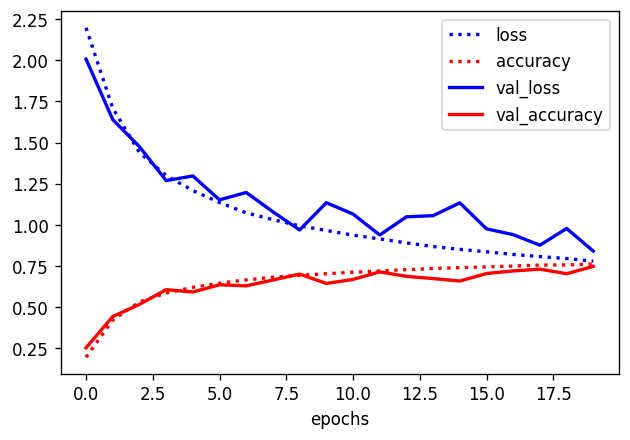

In [0]:
# Replace with the preprocessed data
X_train_pre = rgb2gray(X_train)
X_val_pre = rgb2gray(X_val)

preprocessed_split = X_train_pre, X_val_pre, y_train, y_val

# Adjusted model
def build_model_1_2():
  model = models.Sequential()
  model.add(layers.Reshape((1024,), input_shape=(32,32,1)))
  model.add(layers.Dense(512, activation='relu', input_shape=(32*32*1,)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(10, activation='sigmoid'))

  model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
  return model


# Evaluate. Use a new name 'model_1_2' to not overwrite the previous trained model
run_evaluation("model_1_2", build_model_1_2, preprocessed_split, base_dir, train=True, epochs=20, batch_size=128)


answer_q_1_2 = """ In this question, the network has the same structures with the previous one. And hyperparameters for training are also same. It could be observed that
the result improves a little bit on training set and validation set. The reason is that the grey images have only one channel, so the input dimension becomes smaller while keeping
important information for classification.
               """
print("Answer is {} characters long".format(len(answer_q_1_2)))

### Question 1.3: Regularization and tuning (4 points)
* Regularize the model. You can explore (and combine) different techniques. What works best?
* Tune other hyperparameters (e.g. learning rate, batch size,...) as you see fit.
* Explain your findings and final design decisions. Retrain the model again on the preprocessed data and discuss the results.
* Return your model in function 'build_model_1_3' and write your answer in 'answer_q_1_3'

Training the model
Train on 63544 samples, validate on 15887 samples
Epoch 1/50
63544/63544 [==============================] - 4s 66us/sample - loss: 1.7656 - accuracy: 0.4319 - val_loss: 2.1487 - val_accuracy: 0.3624
Epoch 2/50
63544/63544 [==============================] - 4s 63us/sample - loss: 1.3779 - accuracy: 0.5579 - val_loss: 2.4013 - val_accuracy: 0.2623
Epoch 3/50
63544/63544 [==============================] - 4s 63us/sample - loss: 1.2878 - accuracy: 0.5853 - val_loss: 1.3984 - val_accuracy: 0.5448
Epoch 4/50
63544/63544 [==============================] - 4s 63us/sample - loss: 1.2346 - accuracy: 0.6071 - val_loss: 1.5904 - val_accuracy: 0.4753
Epoch 5/50
63544/63544 [==============================] - 4s 64us/sample - loss: 1.2316 - accuracy: 0.6052 - val_loss: 1.7949 - val_accuracy: 0.5019
Epoch 6/50
63544/63544 [==============================] - 4s 65us/sample - loss: 1.2071 - accuracy: 0.6158 - val_loss: 1.2025 - val_accuracy: 0.6105
Epoch 7/50
63544/63544 [=============

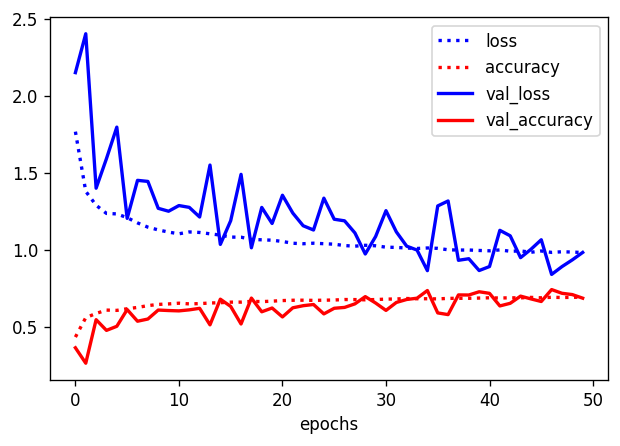

In [0]:
from keras import regularizers

def build_model_1_3():
  model = models.Sequential()
  model.add(layers.Reshape((1024,), input_shape=(32,32,1)))
  model.add(layers.Dense(512, activation='relu', input_shape=(32*32*1,)))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(10, activation='sigmoid'))

  model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
  return model


run_evaluation("model_1_3", build_model_1_3, preprocessed_split, base_dir, 
               train=True, epochs=50, batch_size=128)


answer_q_1_3 = """ Dropout with p=0.2 and bn layers are adopted. Dropout is designed for regularization and bn layer is designed to help the network converges faster. 
However the performances are not better. There are many reasons for that. One important reason is the network becomes underfitting with regularization
tools. In order to improve the performances, more images should be fed to the network for training. Also, we can train the network with more epochs.
              
               """
print("Answer is {} characters long".format(len(answer_q_1_3)))

## Part 2. Convolutional neural networks (10 points)
### Question 2.1: Design a ConvNet (7 points)
- Build a sequential convolutional neural network. Try to achieve the best validation accuracy you can. You should be able to get at least 90% accuracy. You can use any depth, any combination of layers, and any kind of regularization and tuning. 
- Add a description of your design choices in 'answer_q_2_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- You are allowed **800** characters for this answer (but don’t ramble).
- The name of the model should be 'model_2_1'. Evaluate it using the 'run_evaluation' function and the preprocessed data.

Training the model
Train on 63544 samples, validate on 15887 samples
Epoch 1/10
63544/63544 [==============================] - 5s 83us/sample - loss: 1.1401 - accuracy: 0.6310 - val_loss: 0.5929 - val_accuracy: 0.8286
Epoch 2/10
63544/63544 [==============================] - 5s 79us/sample - loss: 0.4923 - accuracy: 0.8566 - val_loss: 0.4221 - val_accuracy: 0.8784
Epoch 3/10
63544/63544 [==============================] - 5s 78us/sample - loss: 0.3843 - accuracy: 0.8898 - val_loss: 0.3711 - val_accuracy: 0.8946
Epoch 4/10
63544/63544 [==============================] - 5s 78us/sample - loss: 0.3280 - accuracy: 0.9056 - val_loss: 0.3400 - val_accuracy: 0.9016
Epoch 5/10
63544/63544 [==============================] - 5s 78us/sample - loss: 0.2914 - accuracy: 0.9152 - val_loss: 0.3589 - val_accuracy: 0.8956
Epoch 6/10
63544/63544 [==============================] - 5s 77us/sample - loss: 0.2649 - accuracy: 0.9248 - val_loss: 0.3344 - val_accuracy: 0.9054
Epoch 7/10
63544/63544 [=============

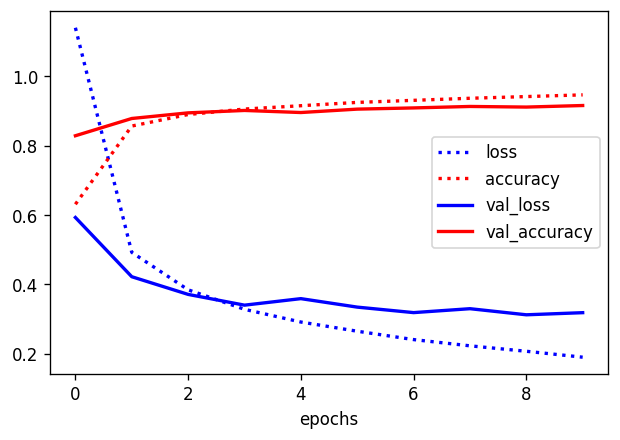

In [0]:
from tensorflow.keras import layers
from tensorflow.keras import models
X_train_pre = rgb2gray(X_train)
X_val_pre = rgb2gray(X_val)

preprocessed_split = X_train_pre, X_val_pre, y_train, y_val

def build_model_2_1():

  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])

  return model



run_evaluation("model_2_1", build_model_2_1, preprocessed_split, base_dir, 
               train=True, epochs=10, batch_size=64)

answer_q_2_1 = """ A three layers convolutional network is designed and trained. The first layer has 32 channels and second layer has 64 channels. The last layer 
has 64 channels. After that, two dense layers are added for classification. Batch size is 64 and 10 epochs is good for the network to converge.
The performances on training set and validation set are higher than 90%. The model is good and performs well. We do not use any bn layers and dropout layers.
If we use those tools, the performances would be better.
               """
print("Answer is {} characters long".format(len(answer_q_2_1)))

### Question 2.2: Data Augmentation (3 points)

- Augment the preprocessed training data. You can explore using image shifts, rotations, zooming, flips, etc. What works well, and what does not?
- Evaluate the model from question 2.1 with the augmented data using the 'run_evaluation' function. Store the new trained model as 'model_2_2'.
- Add a description of your design choices in 'answer_q_2_2': explain what you did and also why. Also discuss the performance of the model.

Training the model
Epoch 1/10
992/992 [==============================] - 25s 25ms/step - loss: 1.4059 - accuracy: 0.5353 - val_loss: 0.6168 - val_accuracy: 0.8306
Epoch 2/10
992/992 [==============================] - 24s 24ms/step - loss: 0.7209 - accuracy: 0.7825 - val_loss: 0.4116 - val_accuracy: 0.8785
Epoch 3/10
992/992 [==============================] - 24s 24ms/step - loss: 0.5400 - accuracy: 0.8394 - val_loss: 0.3592 - val_accuracy: 0.8935
Epoch 4/10
992/992 [==============================] - 24s 24ms/step - loss: 0.4630 - accuracy: 0.8624 - val_loss: 0.3429 - val_accuracy: 0.8982
Epoch 5/10
992/992 [==============================] - 24s 24ms/step - loss: 0.4190 - accuracy: 0.8767 - val_loss: 0.3289 - val_accuracy: 0.9015
Epoch 6/10
992/992 [==============================] - 24s 24ms/step - loss: 0.3840 - accuracy: 0.8862 - val_loss: 0.2860 - val_accuracy: 0.9152
Epoch 7/10
992/992 [==============================] - 24s 24ms/step - loss: 0.3642 - accuracy: 0.8925 - val_loss: 0.2

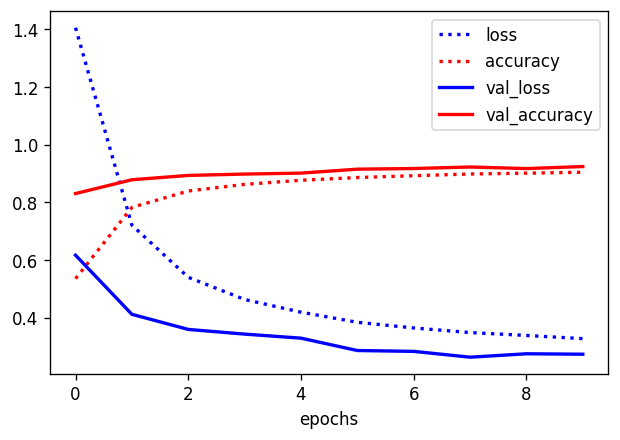

In [0]:
# Note that we build the same untrained model as in question 2.1 but store the 
# trained version as model_2_2. Change attributes as needed to run on augmented
# data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

augmented_split = preprocessed_split
X_train_pre = augmented_split[0]
X_val_pre = augmented_split[1]
y_train = augmented_split[2]
y_val = augmented_split[3]

train_datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, shear_range=0.2, zoom_range=0.1, horizontal_flip=False, fill_mode='nearest')

it_train = train_datagen.flow(X_train_pre, y_train, batch_size=64)

augmented_split = (it_train, X_val_pre, y_val)



run_evaluation("model_2_2", build_model_2_1, augmented_split, base_dir, train=True, generator=True, epochs=10, batch_size=128, steps_per_epoch=X_train_pre.shape[0]//64)


answer_q_2_2 = """ In this question, the same network with 2.1 is trained with data augmentation. The performances are similar. The model is good since results on
the training set and validation set outperforms than 90%. For data augmentation, we use width and height shift, horizontal flip, zoom and shear. Data augmentation does
not show strong effects to the network because more batches are needed for the network. Also, the parameters of the methods of data augmentation need to be tuned.
               """
print("Answer is {} characters long".format(len(answer_q_2_2)))

## Part 3. Model interpretation (10 points)
### Question 3.1: Interpreting misclassifications (2 points)
Study which errors are still made by your last model (model_2_2) by evaluating it on the test data. You do not need to retrain the model.
* What is the accuracy of model_2_2 on the test data? Store this in 'test_accuracy_3_1'.
* Plot the confusion matrix in 'plot_confusion_matrix' and discuss which classes are often confused.
* Visualize the misclassifications in more depth by focusing on a single
class (e.g. the number '2') and analyse which kinds of mistakes are made for that class. For instance, are the errors related to the background, noisiness, etc.? Implement the visualization in 'plot_misclassifications'.
* Summarize your findings in 'answer_q_3_1'

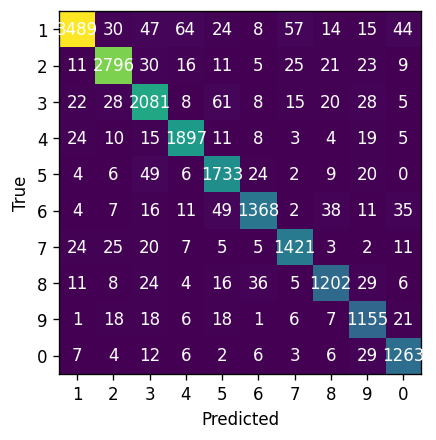

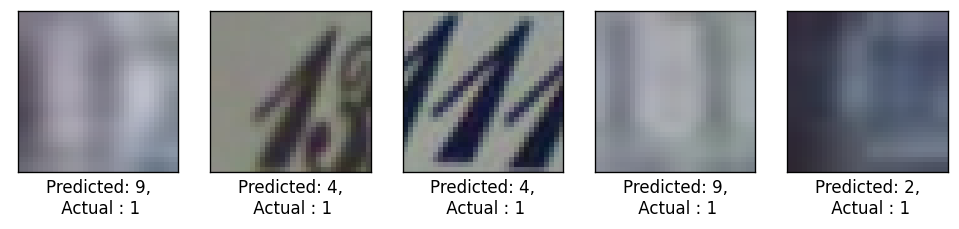

Answer is 560 characters long


In [0]:
from sklearn.metrics import confusion_matrix


model_2_2 = load_model_from_file(base_dir, "model_2_2")
X_train_pre = rgb2gray(X_train)
X_test_pre = rgb2gray(X_test)
y_pred = model_2_2.predict(X_test_pre)

svhn_classes = {0: "1", 1: "2", 2: "3", 3: "4", 4: "5",
                 5: "6", 6: "7", 7: "8", 8: "9", 9: "0"}


misclassified_samples = np.nonzero(np.argmax(y_test, axis=1) != np.argmax(y_pred, axis=1))[0]


onelist = []
for nr, i in enumerate(misclassified_samples):
  temp_label = y_test[i]
  if np.argmax(temp_label) == 0:
    onelist.append(i)



test_accuracy_3_1 = 0.927


def plot_confusion_matrix():

  cm = confusion_matrix(np.argmax(y_test, axis=1),np.argmax(y_pred, axis=1))
  fig, ax = plt.subplots()
  im = ax.imshow(cm)
  ax.set_xticks(np.arange(10)), ax.set_yticks(np.arange(10))
  ax.set_xticklabels(list(svhn_classes.values()))
  ax.set_yticklabels(list(svhn_classes.values()))
  ax.set_ylabel('True')
  ax.set_xlabel('Predicted')
  for i in range(100):
    ax.text(int(i/10),i%10,cm[i%10,int(i/10)], ha="center", va="center", color="w")



def plot_misclassifications():
  
  fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
  for nr, i in enumerate(onelist[:5]):
    axes[nr].imshow(X_test[i])
    axes[nr].set_xlabel("Predicted: %s,\n Actual : %s" % (svhn_classes[np.argmax(y_pred[i])], svhn_classes[np.argmax(y_test[i])]))
    axes[nr].set_xticks(()), axes[nr].set_yticks(())

  plt.show();



plot_confusion_matrix()
plot_misclassifications()



answer_q_3_1 = """ Class "1", "3" and "7" are often confused. In order to visualize the misclassifications
and find reasons of errors, we take class "1" as as example. We find five samples(label:1) which are mis-classified
to other labels. It could be concluded that some mis-classification is attributed to background or noises. That means
the digit is difficult to recognize. Some mis-ckassification is attributed to "similar" sturctures with other digits.
For instance "1" and "4". If we use more samples, other reasons could also be observed.
               
               """
print("Answer is {} characters long".format(len(answer_q_3_1)))

### Question 3.2: Visualizing activations (4 points)
* Implement a function `plot_activations()` that returns the most interesting activations (feature maps). Select the first example from the test set. Retrieve and visualize the activations of model 2_2 for that example (make sure you load that model in the function), for every filter for different convolutional layers (at different depths in the network).
* Give an explanation (as detailed as you can) about your observations in 'answer_q_3_2'. Is your model indeed learning something useful?

In [0]:

from tensorflow.keras import models


images_per_row = 16


def plot_activations():
  
  model_2_2 = load_model_from_file(base_dir, "model_2_2")
  layer_names = []
  for layer in model_2_2.layers[:6]:
    layer_names.append(layer.name)
  img_tensor = X_test_pre[0]
  img_tensor = np.expand_dims(img_tensor, axis=0) 
  layer_outputs = [layer.output for layer in model_2_2.layers[:6]]
  activation_model = models.Model(inputs=model_2_2.input, outputs=layer_outputs)
  activations = activation_model.predict(img_tensor)

  layer_indexes = [0,2,4]
  for layer_index in layer_indexes:

    start = layer_index
    end = layer_index+1

    # Now let's display our feature maps
    for layer_name, layer_activation in zip(layer_names[start:end], activations[start:end]):
      # This is the number of features in the feature map
      n_features = layer_activation.shape[-1]

      # The feature map has shape (1, size, size, n_features)
      size = layer_activation.shape[1]

      # We will tile the activation channels in this matrix
      n_cols = n_features // images_per_row
      display_grid = np.zeros((size * n_cols, images_per_row * size))

      # We'll tile each filter into this big horizontal grid
      for col in range(n_cols):
        for row in range(images_per_row):
          channel_image = layer_activation[0, :, :, col * images_per_row + row]
          # Post-process the feature to make it visually palatable
          channel_image -= channel_image.mean()
          channel_image /= channel_image.std()
          channel_image *= 64
          channel_image += 128
          channel_image = np.clip(channel_image, 0, 255).astype('uint8')
          display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

      # Display the grid
      scale = 1. / size
      plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
      plt.title("Activation of layer {} ({})".format(layer_index+1,layer_name))
      plt.grid(False)
      plt.imshow(display_grid, aspect='auto', cmap='viridis')

    plt.show()



answer_q_3_2 = """ There are three convolutional layers in our model. So we need to visualize feature maps of the three layers. We can find that the first convolutional layer captures various edges. The second convolutional layer is able to describe some specific
features, for instance, some special curves of the digit. Also the last layer illustrates more abstract patterns. Actually we know that our network is learning features
of the training dataset.  
               """
print("Answer is {} characters long".format(len(answer_q_3_2)))

Answer is 457 characters long


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


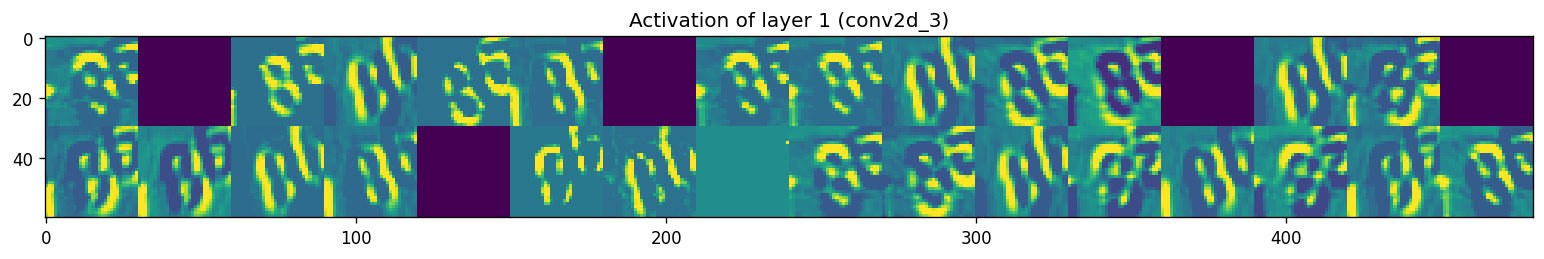

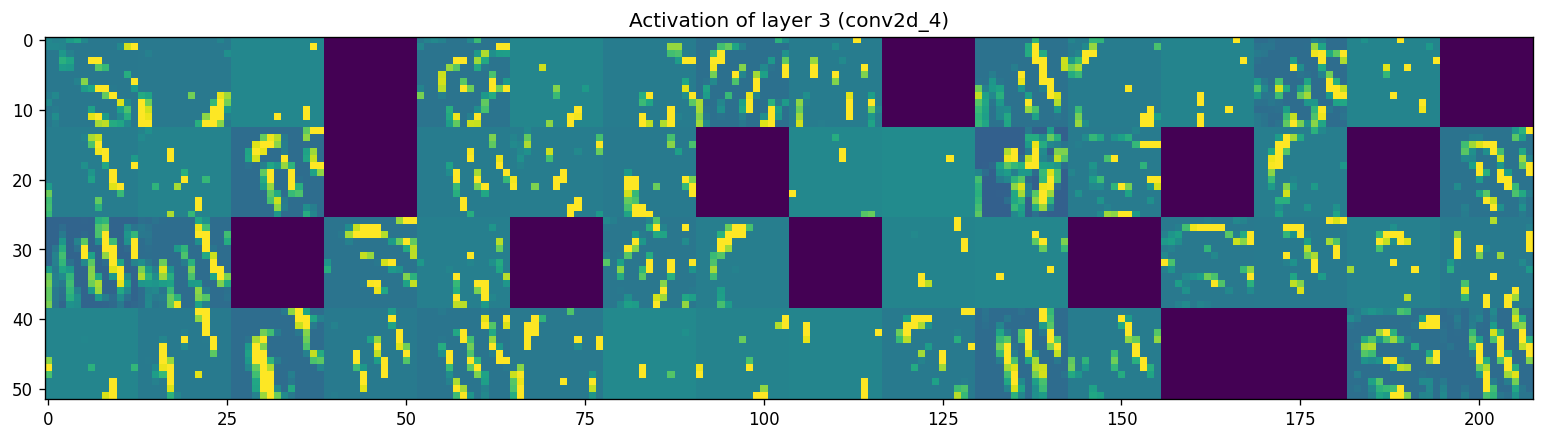

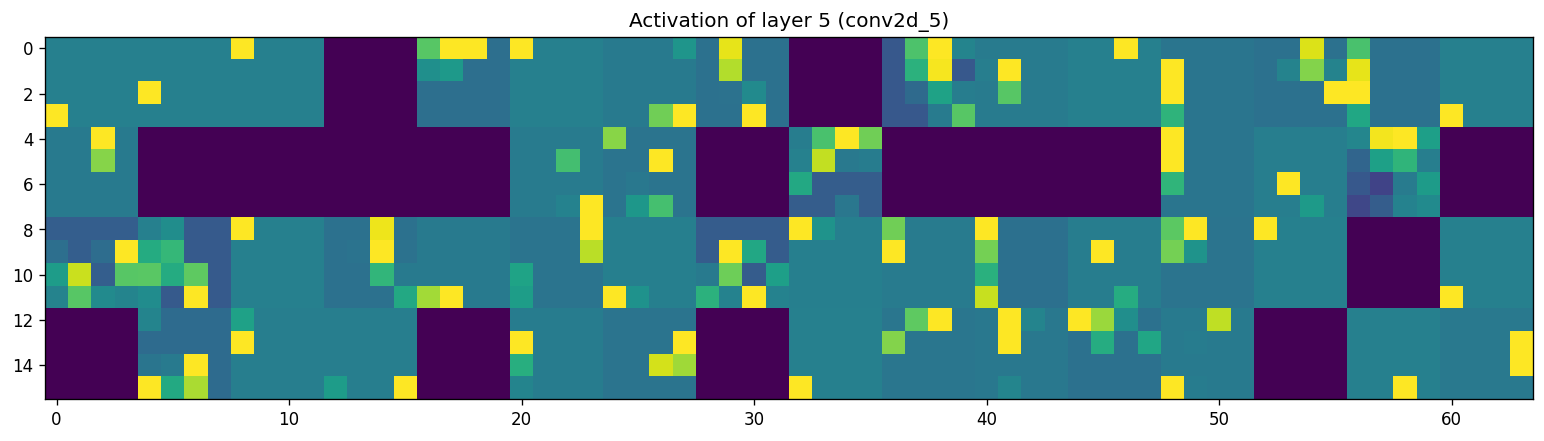

In [0]:
plot_activations()

### Question 3.3: Visualizing activations (4 points)
* Again, select the first example from the test set, and the trained model_2_2.
* Implement a function `plot_activation_map()` that builds and shows a class activation map for your last convolutional layer that highlights what the model is paying attention to when classifying the example.
* If possible, superimpossible the activation map over the image. If not, plot
them side by side. Implement a function 'plot_3_3' that returns the entire plot.

In [0]:
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
import cv2

tf.compat.v1.disable_eager_execution()

K.clear_session()



def plot_3_3():
  model_2_2 = load_model_from_file(base_dir, "model_2_2")
  img_tensor = X_test_pre[0]
  x = np.expand_dims(img_tensor, axis=0)
  eight_dig_output = model_2_2.output[:, 7]
  last_conv_layer = model_2_2.get_layer(index=4)
  grads = K.gradients(eight_dig_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model_2_2.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])

  for i in range(64):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

  # # The channel-wise mean of the resulting feature map
  # # is our heatmap of class activation

  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  # plt.matshow(heatmap)
  # plt.show()

  # img = cv2.imread(img_path)
  # img = X_test[0]
  # img = img_tensor

  heatmap = cv2.resize(heatmap, (32, 32))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = heatmap * 0.001 + X_test[0]
  plt.rcParams['figure.dpi'] = 120
  f, ax1 = plt.subplots(1, 1, sharey=True)
  ax1.imshow(superimposed_img)
  
  

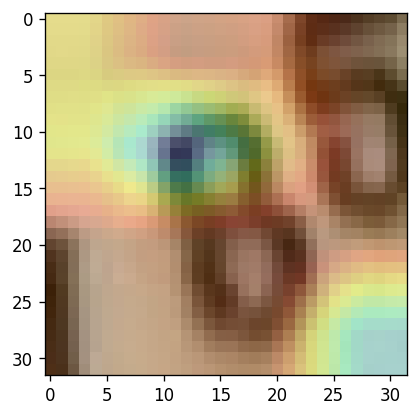

In [0]:
plot_3_3()

## Part 4. Transfer learning (10 points)
### Question 4.1 Fast feature extraction with VGG16 (5 points)
- Import the VGG16 model, pretrained on ImageNet. [See here](https://keras.io/applications/). Only import the convolutional part, not the dense layers.
- Implement a function 'build_model_4_1` that adds a dense layer to the convolutional base, and freezes the convolutional base. Consider unfreezing the last few convolutional layers and evaluate whether that works better.
- Train the resulting model on the *original* (colored) training data
- Evaluate the resulting model using 'run_evaluate'. Discuss the observed performance in 'answer_q_4_1'.

Training the model
Epoch 1/20
992/992 [==============================] - 81s 82ms/step - loss: 0.9912 - accuracy: 0.6657 - val_loss: 0.8562 - val_accuracy: 0.7376
Epoch 2/20
992/992 [==============================] - 81s 82ms/step - loss: 0.7371 - accuracy: 0.7515 - val_loss: 0.6992 - val_accuracy: 0.7684
Epoch 3/20
992/992 [==============================] - 81s 82ms/step - loss: 0.6661 - accuracy: 0.7762 - val_loss: 0.6212 - val_accuracy: 0.8003
Epoch 4/20
992/992 [==============================] - 81s 81ms/step - loss: 0.6218 - accuracy: 0.7919 - val_loss: 0.5807 - val_accuracy: 0.8086
Epoch 5/20
992/992 [==============================] - 81s 81ms/step - loss: 0.5870 - accuracy: 0.8045 - val_loss: 0.6245 - val_accuracy: 0.8012
Epoch 6/20
992/992 [==============================] - 81s 81ms/step - loss: 0.5561 - accuracy: 0.8137 - val_loss: 0.5652 - val_accuracy: 0.8141
Epoch 7/20
992/992 [==============================] - 81s 81ms/step - loss: 0.5326 - accuracy: 0.8223 - val_loss: 0.6

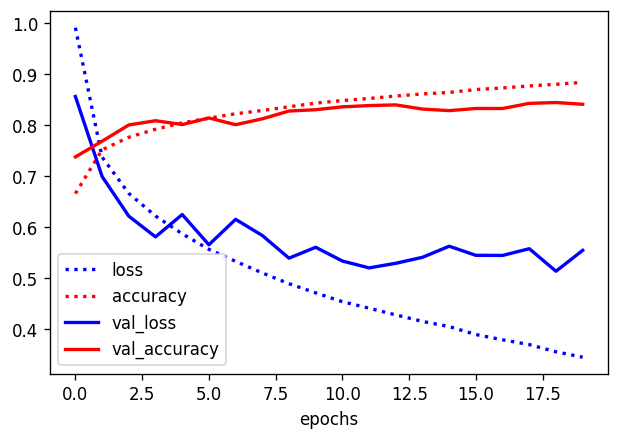

In [0]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import optimizers


evaluation_split = X_train, X_val, y_train, y_val
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False



# def build_model_4_1():
#   model = models.Sequential()
#   model.add(conv_base)
#   model.add(layers.Flatten())
#   model.add(layers.Dense(10, activation='sigmoid'))
#   conv_base.trainable = False

#   model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])
#   return model


def build_model_4_1():
  model = models.Sequential()
  model.add(conv_base)
  model.add(layers.BatchNormalization())
  model.add(layers.Flatten())
  model.add(layers.Dense(10, activation='sigmoid'))

  model.compile(optimizer=optimizers.RMSprop(lr=1e-3), loss='categorical_crossentropy',metrics=['accuracy'])
  return model





train_datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1, zoom_range=0.1, horizontal_flip=False, fill_mode='nearest')

it_train = train_datagen.flow(X_train, y_train, batch_size=128)

augmented_split = (it_train, X_val, y_val)



run_evaluation("model_4_1", build_model_4_1, augmented_split, base_dir, train=True, generator=True, epochs=20, batch_size=64, steps_per_epoch=X_train_pre.shape[0]//64)


# run_evaluation("model_4_1", build_model_4_1, evaluation_split, base_dir, train=True, epochs=20, batch_size=128) 


answer_q_4_1 = """ When we freeze the convolutional base and only train the dense layer, the performances are about 60% on training set and validation set.
However, if we unfreeze the last convolutional block and train it together with the dense layer, the performances improve a lot and achieve more than 80%.
For transfer learning, we can open more layers of pretrained model if we have enough data. Otherwise, we need to be careful for those unfrozen layers.
               """
print("Answer is {} characters long".format(len(answer_q_4_1)))

### Question 4.2 Embeddings and pipelines (5 points)
- Generate embeddings of the original images by running them through the trained convolutional part of model_4_1 (without the dense layer) and returning the output. Embed the training and test data and store them to disk using the helper functions below. Implement a function `store_embeddings` that loads model_4_1 and stores all necessary embeddings to file. Make sure to run it once so that the embeddings are stored (and submitted).
- Implement a function 'generate_pipeline' that returns an scikit-learn pipeline. You can use any non-deep learning technique (eg. SVMs, RFs,...), and preprocessing technique. You can do model selection using the validation set. 
- Implement a function 'evaluate_pipeline' that evaluates a given pipeline on a given training and test set. 
- Implement a function 'evaluation_4_2' that evaluates your pipeline on the embedded training and test set (loaded from file) and returns the accuracy. 
- Describe what you did and what you observed. Report the obtained accuracy score. Can you beat your best model thus far?

In [0]:
import pickle
import gzip

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer



def store_embedding(X, name):  
  with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'wb') as file_pi:
    pickle.dump(X, file_pi)

def load_embedding(name):
  with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'rb') as file_pi:
    return pickle.load(file_pi)

def store_embeddings():
  """ Stores all necessary embeddings to file
  """
  model = load_model_from_file(base_dir, "model_4_1")
  feature_extraction_model = model.get_layer("vgg16")
  features_train = feature_extraction_model.predict(X_train_all)
  features_test = feature_extraction_model.predict(X_test)
  features_train = features_train.reshape(features_train.shape[0], 512)
  features_test = features_test.reshape(features_test.shape[0], 512)


  store_embedding(features_train, "train_embeddings")
  store_embedding(features_test, "test_embeddings")


def generate_pipeline():
  """ Returns an sklearn pipeline.
  """

  # pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC(C=100))])
  pipe = Pipeline([ ('imputer', SimpleImputer(strategy='mean'))  , ("reg", LinearRegression()) ])
  
  return pipe




def evaluate_pipeline(pipeline, X_train, y_train, X_test, y_test):
  """ Evaluates the given pipeline, trained on the given embedded training set and 
      evaluated on the supplied embedded test set. Returns the accuracy score.
  """
  
  # scores = cross_val_score(pipe, cancer.data, cancer.target)
  
  X_train_trans = X_train.reshape(X_train.shape[0], -1)
  X_test_trans = X_test.reshape(X_test.shape[0], -1)
  # y_train_trans = y_train.argmax(axis=1)
  # y_test_trans = y_test.argmax(axis=1)
  
  pipeline.fit(X_train_trans, y_train)
  # print(">>>>>>>>>>>>>>>>>>>>.")
  # train_accuracy = grid.best_score_
  # test_accuracy = grid.score(X_test, y_test)
  test_accuracy = pipeline.score(X_test_trans, y_test)
  train_accuracy = pipeline.score(X_train_trans, y_train)

  return train_accuracy, test_accuracy
 



def evaluation_4_2(X_train, y_train, X_test, y_test):
  """ Runs 'evaluate_pipeline' with embedded versions of the input data 
  and returns the accuracy.
  """
  pipeline = generate_pipeline()
  train_accuracy, test_accuracy = evaluate_pipeline(pipeline=pipeline, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

  return train_accuracy, test_accuracy




answer_q_4_2 = """ With the extracted features, we could utilize non-deep learning techniques to do further classification. We build a pipeline to train
and predict. We find that the results of the ML model is lower than networks. In this question, a linear regression is used because the training time 
is very long if SVM is applied. Also, we did not use any model
selection methods since those advanced techniques(cross validation, grid search) also cost more time. The assignment is finished on Google Colab, any long time 
training would cause the connection to be cut down. If we have more computation resources, the perforamces of the model could be better.
               """
print("Pipeline:",generate_pipeline())
print("Answer is {} characters long".format(len(answer_q_4_2)))


Pipeline: Pipeline(memory=None,
         steps=[('imputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)
Answer is 662 characters long


In [0]:
store_embeddings()
train_emb = load_embedding("train_embeddings")
test_emb = load_embedding("test_embeddings")
y_test_label = y_test.argmax(axis=1)
y_train_label = y_train_all.argmax(axis=1)
train_accuracy, test_accuracy = evaluation_4_2(X_train = train_emb, y_train = y_train_label, X_test = test_emb, y_test = y_test_label)
print("train accuracy:", train_accuracy)
print("test accuracy:", test_accuracy)

train accuracy: 0.7881310562128601
test accuracy: 0.7043968287977082
